In [22]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from pathlib import Path
#import tensorflow as tf

# Import our input dataset
#data = Path('./Data/FIMA_cleaned.csv')
data = Path('./Data/FEMA_Clean14.csv')
FEMA_df = pd.read_csv(data)
FEMA_df.head()

C:\Users\patel\Anaconda3\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,reportedcity,dateofloss,elevationdifference,floodzone,latitude,longitude,numberoffloorsintheinsuredbuilding,occupancytype,originalconstructiondate,amountpaidonbuildingclaim,state,reportedzipcode
0,OCEANSIDE,1998-02-07,999.0,X,33.2,-117.3,4.0,1.0,1963-01-01,0.00,CA,92056
1,NEW ORLEANS,2005-08-29,999.0,X,29.9,-90.0,2.0,1.0,1967-07-01,0.00,LA,70131
2,NAVARRE,1998-09-28,999.0,X,30.4,-86.9,1.0,1.0,1972-01-01,8813.21,FL,32566
3,BEAUFORT,1994-10-07,999.0,X,32.4,-80.7,2.0,1.0,1960-01-01,2906.00,SC,29902
4,MELBOURNE,1996-03-11,999.0,X,28.3,-80.7,1.0,1.0,1988-01-01,3875.53,FL,32940


In [32]:
df = FEMA_df.copy()
df = df.drop("reportedzipcode", axis=1)
#df = df.drop("state", axis=1)
#df = df.drop("floodzone", axis=1)
df = df.drop("dateofloss", axis=1)
df = df.drop("originalconstructiondate", axis=1)
df = df.drop("reportedcity", axis=1)
#df = df.drop("latitude", axis=1)
#df = df.drop("longitude", axis=1)
FEMA_encoded = pd.get_dummies(df, columns=["state", "floodzone"])#, "reportedzipcode"])


y =FEMA_encoded.copy()
X = FEMA_encoded.copy()
X = X.drop("amountpaidonbuildingclaim", axis=1)


In [33]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y['amountpaidonbuildingclaim'],
                                                   random_state=1)

In [34]:
#X_train.dtypes
X_train.shape

(1489762, 138)

In [35]:
# Train the Classifier

from sklearn.linear_model import LinearRegression

#random forest, neural networks with linear regression
model = LinearRegression() 
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
model.score(X_test, y_test)

0.06981193690929988

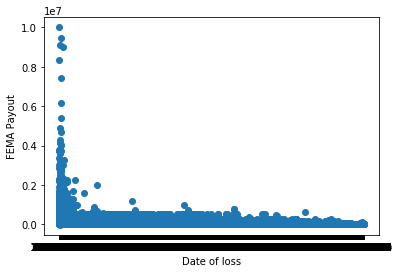

In [37]:
import matplotlib.pyplot as plt
plt.scatter(FEMA_df.dateofloss,FEMA_df.amountpaidonbuildingclaim)
plt.xlabel('Date of loss')
plt.ylabel('FEMA Payout')
plt.show()